In [1]:
install.packages("dplyr")                       # Install dplyr for data manipulation
library("dplyr")                                # Load dplyr

# Installing the package 
install.packages("caTools")    # For Logistic regression 
library(caTools)

install.packages('randomForest') # For generating random forest model
library(randomForest)

install.packages('caret')                    # classification and regression training : The library caret has a function to make prediction.
library(caret)

library(corrplot)                            # Correlation matrix

library(rpart)                               # for random Forest

library(VIM)
library(magrittr)

Installing package into 'C:/Users/anwes/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\anwes\AppData\Local\R\win-library\4.2\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\anwes\AppData\Local\R\win-library\4.2\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\anwes\AppData\Local\Temp\RtmpWagJ5e\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Installing package into 'C:/Users/anwes/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'caTools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caTools'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\anwes\AppData\Local\R\win-library\4.2\00LOCK\caTools\libs\x64\caTools.dll to C:\Users\anwes\AppData\Local\R\win-library\4.2\caTools\libs\x64\caTools.dll: Permission denied"
Warning message:
"restored 'caTools'"



The downloaded binary packages are in
	C:\Users\anwes\AppData\Local\Temp\RtmpWagJ5e\downloaded_packages


Installing package into 'C:/Users/anwes/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anwes\AppData\Local\Temp\RtmpWagJ5e\downloaded_packages


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


Installing package into 'C:/Users/anwes/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anwes\AppData\Local\Temp\RtmpWagJ5e\downloaded_packages


Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

corrplot 0.92 loaded

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: 'VIM'


The following object is masked from 'package:datasets':

    sleep




In [2]:
censusdata = read.csv("E:\\DMML\\project\\data\\salary.csv")
#load the data in to data frame
censusdata = data.frame(censusdata)

In [3]:
censusdata$salary=as.factor(censusdata$salary)

In [4]:
head(censusdata)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<fct>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
summary(censusdata)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [6]:
#mydata[mydata == "?"] <- NA
idx <- censusdata == " ?"
# replace elements with NA
is.na(censusdata) <- idx

In [7]:
#checking for missing values in the data
null_values=data.frame(no_of_null_values=colSums(is.na(censusdata)))
head(null_values,15)

,no_of_null_values
,<dbl>
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0


Warning message in plot.aggr(res, ...):
"not enough horizontal space to display frequencies"



 Variables sorted by number of missings: 
       Variable      Count
     occupation 0.05660146
      workclass 0.05638647
 native.country 0.01790486
            age 0.00000000
         fnlwgt 0.00000000
      education 0.00000000
  education.num 0.00000000
 marital.status 0.00000000
   relationship 0.00000000
           race 0.00000000
            sex 0.00000000
   capital.gain 0.00000000
   capital.loss 0.00000000
 hours.per.week 0.00000000
         salary 0.00000000


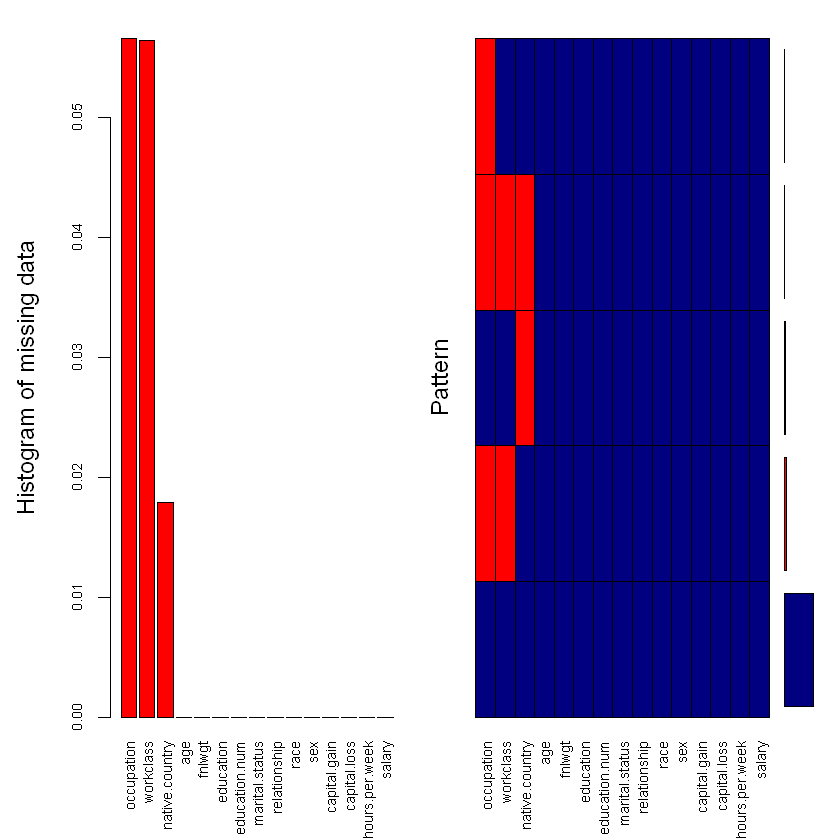

In [8]:
#missing data visualization
aggr_plot <- aggr(censusdata, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE, 
              labels=names(censusdata), cex.axis=.7, gap=3, 
              ylab=c("Histogram of missing data","Pattern")
              )

In [9]:
censusdata=na.omit(censusdata)

In [10]:
#checking for missing values in the data
null_values=data.frame(no_of=colSums(is.na(censusdata)))
head(null_values,15)

,no_of
,<dbl>
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0


In [11]:
#checking for duplicate values
sum(duplicated(censusdata))

[1] 23

In [12]:
censusdata <- censusdata[!duplicated(censusdata), ]
censusdata

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<fct>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [13]:
sum(duplicated(censusdata))

[1] 0

In [14]:
print(nrow(censusdata))

[1] 30139


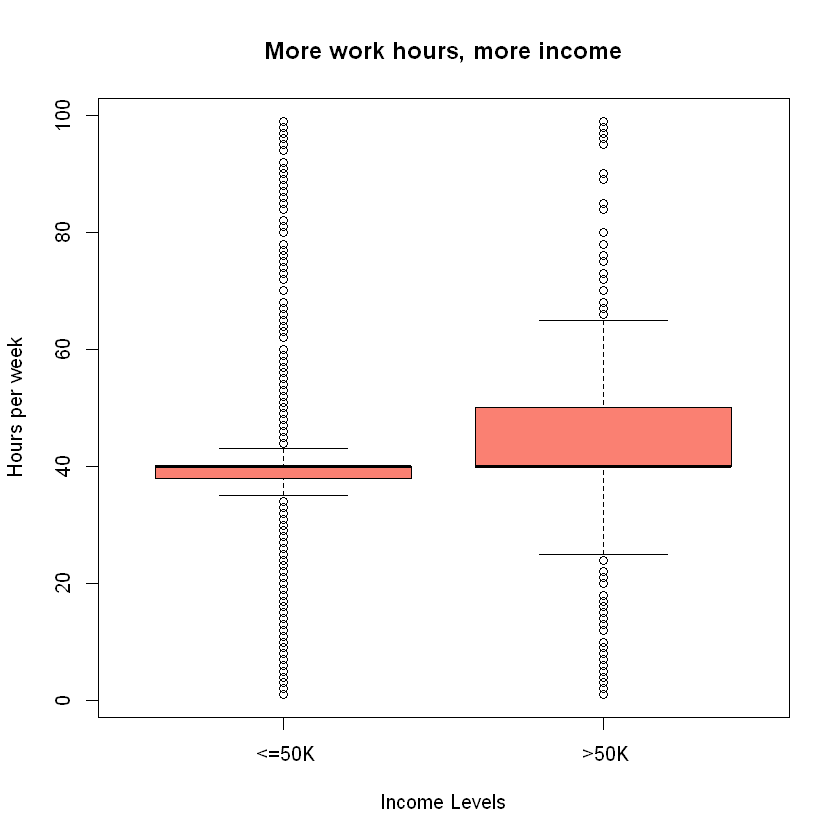

In [15]:
boxplot (hours.per.week ~ salary, data = censusdata, 
     main = "More work hours, more income",
     xlab = "Income Levels", ylab = "Hours per week", col = "salmon")

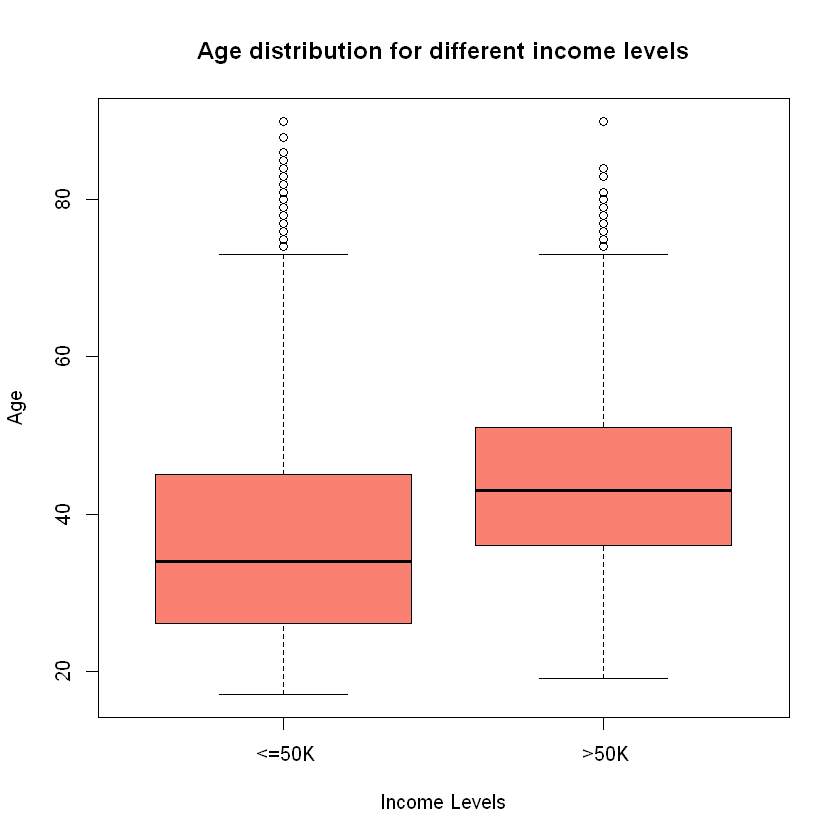

In [16]:
#
boxplot (age ~ salary, data = censusdata, 
     main = "Age distribution for different income levels",
     xlab = "Income Levels", ylab = "Age", col = "salmon")

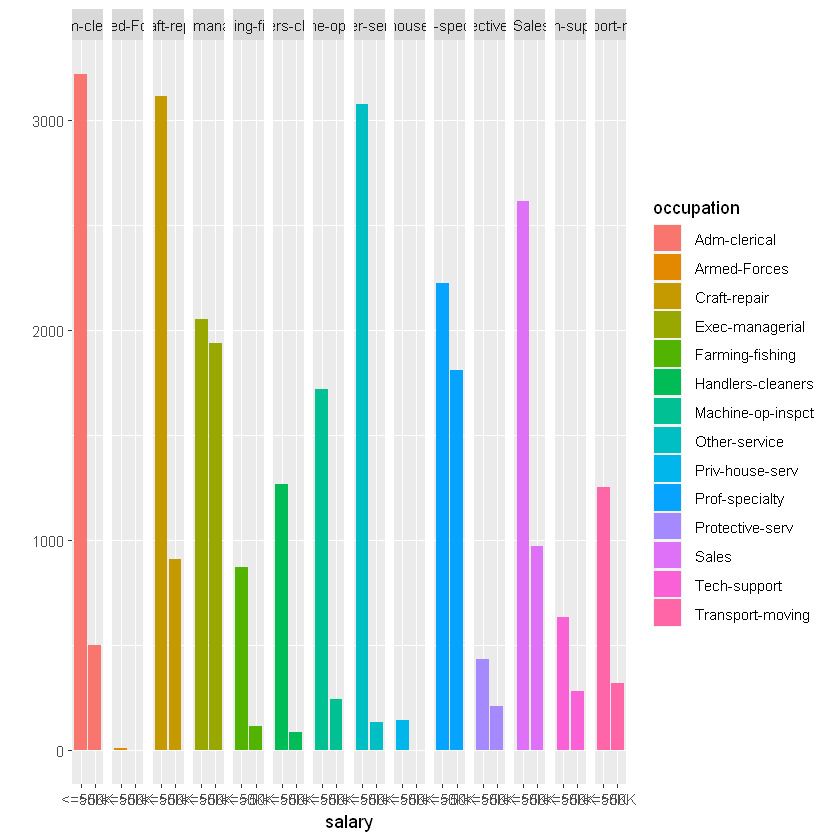

In [17]:
qplot(salary, data = censusdata, fill = occupation) + facet_grid (. ~ occupation)

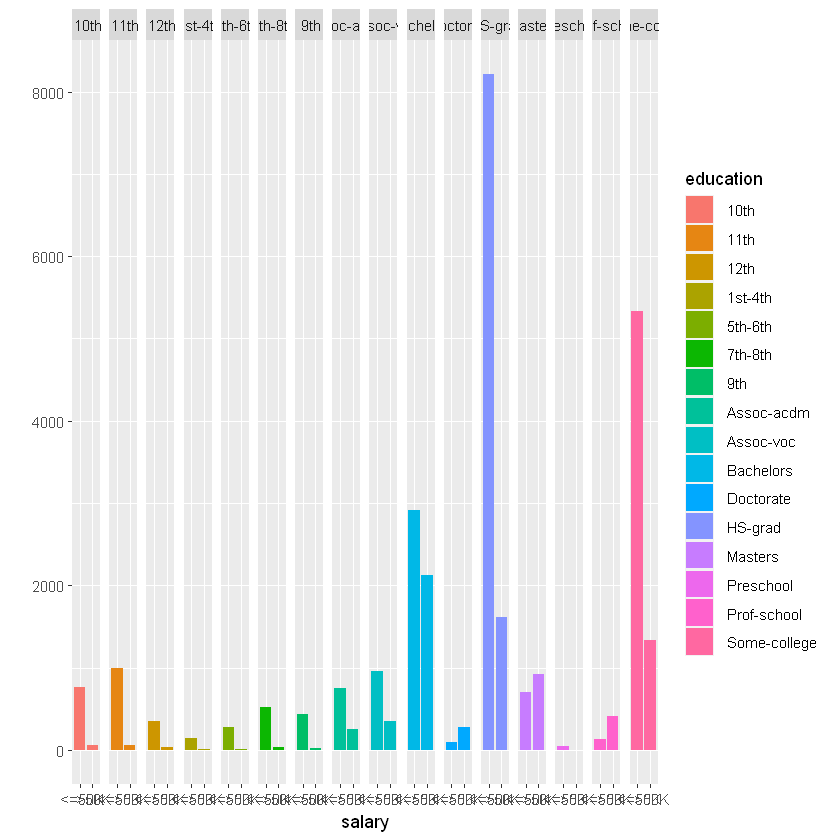

In [18]:
qplot(salary, data = censusdata, fill = education) + facet_grid (. ~ education)

Checking for skewing of data


In [19]:
# for skewness()
install.packages('moments')
library(moments)

Installing package into 'C:/Users/anwes/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anwes\AppData\Local\Temp\RtmpWagJ5e\downloaded_packages


In [20]:
skewedVars<- NA

for(i in names(censusdata)){
   if(is.numeric(censusdata[,i])){
     if(i != "salary"){
       # Enters this block if variable is non-categorical
       skewVal <- skewness(censusdata[,i])
       print(paste(i, skewVal, sep = ": "))
       if(abs(skewVal) > 0.5){
         skewedVars <- c(skewedVars, i)
       }
     }
   }
 }


[1] "age: 0.52894476078798"
[1] "fnlwgt: 1.45998277140037"
[1] "education.num: -0.302829830357738"
[1] "capital.gain: 11.8975120380298"
[1] "capital.loss: 4.52418367946322"
[1] "hours.per.week: 0.332369428522311"


The attributes named fnlwgt, capitalgain, capitalloss is highly skewed as absolute value of these are far greater  than 0.5

In [21]:
censusdata<- censusdata[c(3,11:13,1,5,2,4,6:10,14:15)]
str(censusdata)

'data.frame':	30139 obs. of  15 variables:
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ marital.status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ native.countr

After rearranging the columns, we are removing capitalgain, capitalloss and applying log transformation on fnlwgt

In [22]:
censusdata.norm<- censusdata
censusdata.norm[,1:3]<- log(censusdata[1:3],2) # where 2 is log base 2
censusdata.norm$capitalgain<- NULL
censusdata.norm$capitalloss<-NULL

Correlation Plot

All correlations <= 0.7 


character(0)

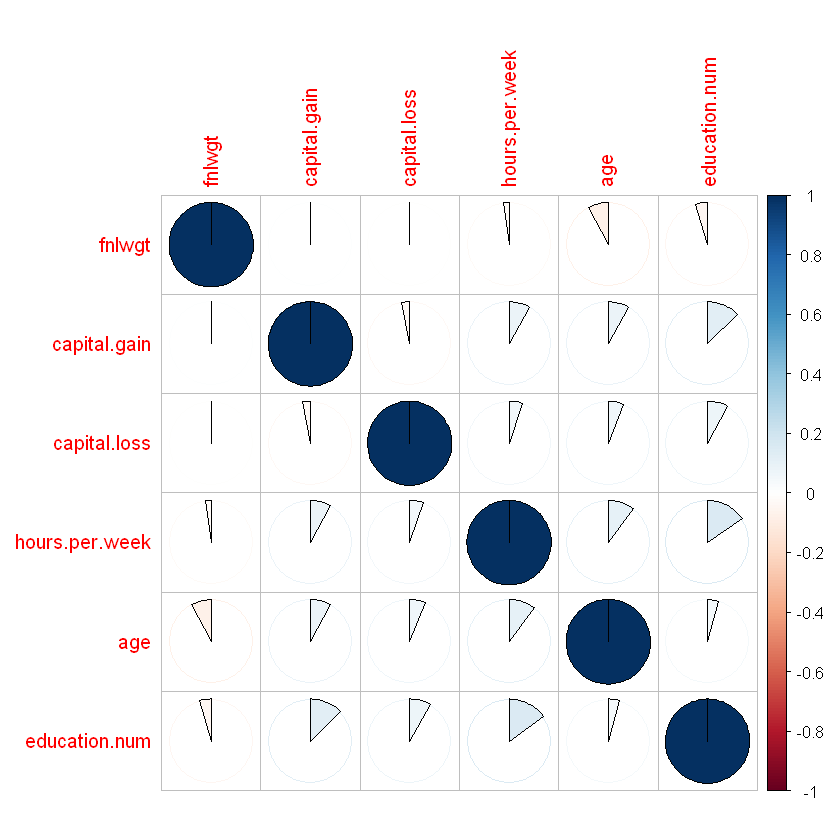

In [23]:
correlat<- cor(censusdata[c(1:6)])
corrplot(correlat, method = "pie",na.label=" ")
highlyCor <- colnames(censusdata)[findCorrelation(correlat, cutoff = 0.7, verbose = TRUE)]

highlyCor # No high Correlations found


In [24]:
summary(censusdata$salary)

<=50K   >50K 
 22633   7506

In [25]:
censusdata$workclass=as.factor(censusdata$workclass)
censusdata$education=as.factor(censusdata$education)
censusdata$marital.status=as.factor(censusdata$marital.status)
censusdata$occupation=as.factor(censusdata$occupation)
censusdata$relationship=as.factor(censusdata$relationship)
censusdata$race=as.factor(censusdata$race)
censusdata$sex=as.factor(censusdata$sex)
censusdata$native.country=as.factor(censusdata$native.country)

# Dividing dataset in train and test

In [26]:
set.seed(123)   #  set seed to ensure you always have same random numbers generated
sample = sample.split(censusdata,SplitRatio = 0.75) # splits the data in the ratio mentioned in SplitRatio. After splitting marks these rows as logical TRUE and the the remaining are marked as logical FALSE
train.data =subset(censusdata,sample ==TRUE) # creates a training dataset named train1 with rows which are marked as TRUE
test.data=subset(censusdata, sample==FALSE)

dim(test.data)

[1] 8037   15

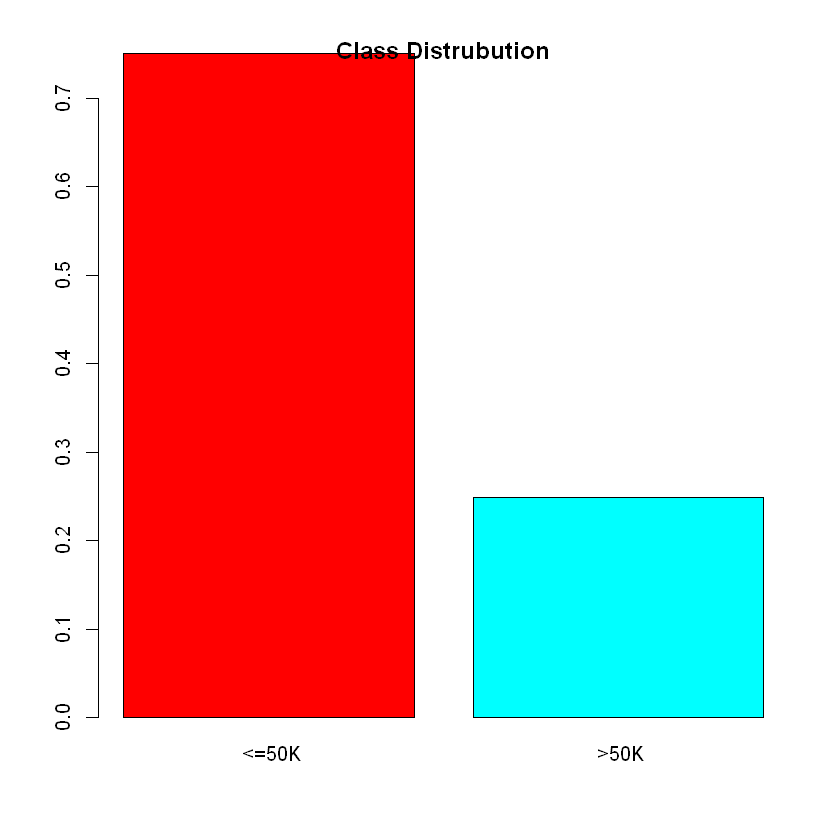

In [27]:
barplot(prop.table(table(censusdata$salary)),
       col=rainbow(2),
       ylim=c(0, 0.7),
       main="Class Distrubution")

# Balancing the dataset

In [28]:
library(ROSE)

Loaded ROSE 0.0-4




In [29]:
data_rose <- ROSE(salary ~., data = train.data)$data
table(data_rose$salary)


 <=50K   >50K 
 11204  10898 

# Decision Tree

In [30]:
tree.model<- rpart(salary~., data=train.data, method="class", minbucket=20)
tree.predict<- predict(tree.model, test.data, type = "class")

In [31]:
confusionMatrix(test.data$salary, tree.predict, mode="everything")

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   5650   309
     >50K    1030  1048
                                          
               Accuracy : 0.8334          
                 95% CI : (0.8251, 0.8415)
    No Information Rate : 0.8312          
    P-Value [Acc > NIR] : 0.302           
                                          
                  Kappa : 0.5101          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8458          
            Specificity : 0.7723          
         Pos Pred Value : 0.9481          
         Neg Pred Value : 0.5043          
              Precision : 0.9481          
                 Recall : 0.8458          
                     F1 : 0.8941          
             Prevalence : 0.8312          
         Detection Rate : 0.7030          
   Detection Prevalence : 0.7414          
      Balanced 

In [32]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following object is masked from 'package:colorspace':

    coords


The following objects are masked from 'package:stats':

    cov, smooth, var




Setting levels: control =  <=50K, case =  >50K

Warning message in value[[3L]](cond):
"Ordered predictor converted to numeric vector. Threshold values will not correspond to values in predictor."
Setting direction: controls < cases



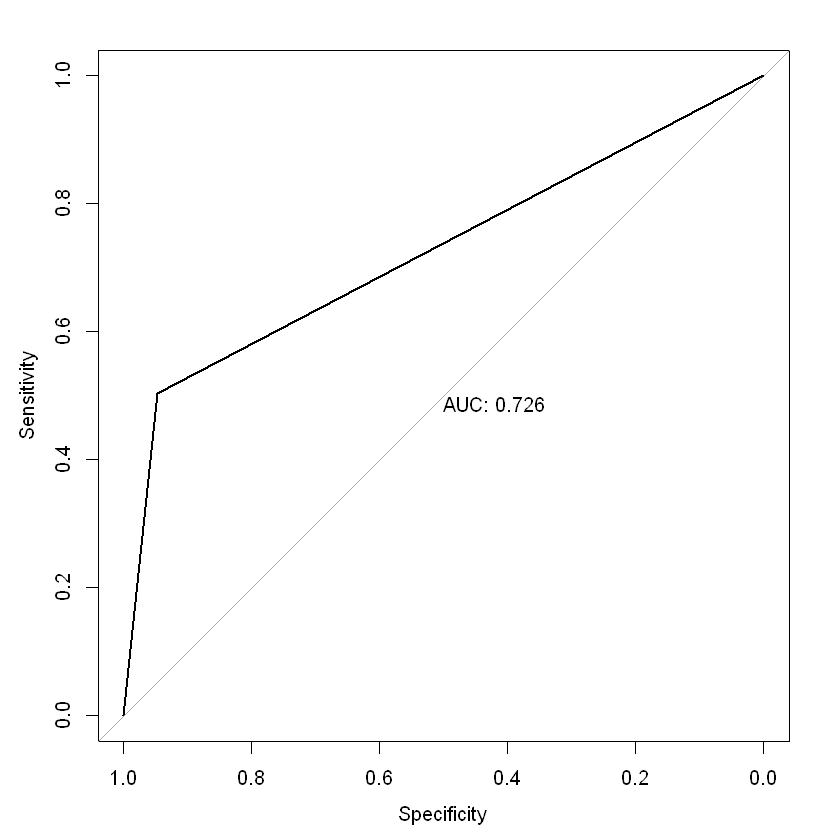

In [33]:
test.data$tree.predict= tree.predict
roc_dt= roc(response= test.data$salary, predictor = factor(test.data$tree.predict, ordered=TRUE), plot=TRUE, print.auc=TRUE)

Decision Tree on balanced dataset

In [34]:
tree.model1<- rpart(salary~., data=data_rose, method="class", minbucket=20)
tree.predict1<- predict(tree.model1, test.data, type = "class")

confusionMatrix(test.data$salary, tree.predict1, mode="everything")

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   5702   257
     >50K    1631   447
                                          
               Accuracy : 0.7651          
                 95% CI : (0.7557, 0.7743)
    No Information Rate : 0.9124          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2192          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7776          
            Specificity : 0.6349          
         Pos Pred Value : 0.9569          
         Neg Pred Value : 0.2151          
              Precision : 0.9569          
                 Recall : 0.7776          
                     F1 : 0.8580          
             Prevalence : 0.9124          
         Detection Rate : 0.7095          
   Detection Prevalence : 0.7414          
      Balanced 

Setting levels: control =  <=50K, case =  >50K

Warning message in value[[3L]](cond):
"Ordered predictor converted to numeric vector. Threshold values will not correspond to values in predictor."
Setting direction: controls < cases



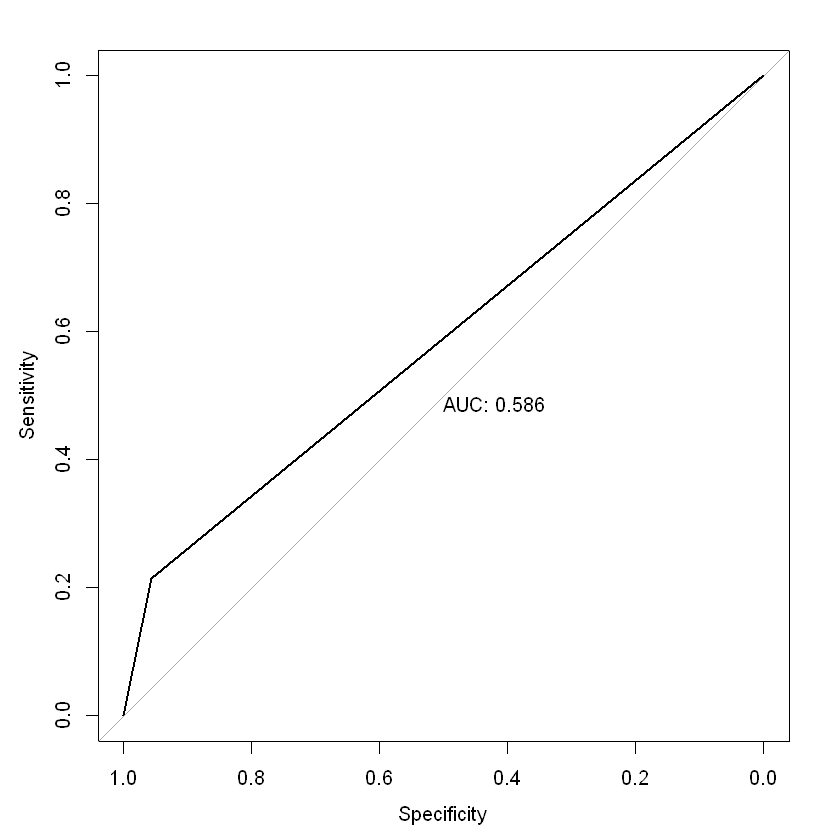

In [35]:
test.data$tree.predict1= tree.predict1
roc_dt1= roc(response= test.data$salary, predictor = factor(test.data$tree.predict1, ordered=TRUE), plot=TRUE, print.auc=TRUE)

# SVM

In [36]:
library(e1071)


Attaching package: 'e1071'


The following objects are masked from 'package:moments':

    kurtosis, moment, skewness




In [37]:
svm.model<- svm(salary~., data = train.data,kernel = "radial", cost = 1, gamma = 0.1)
svm.predict <- predict(svm.model, test.data)
confusionMatrix(test.data$salary, svm.predict, mode="everything")

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   5583   376
     >50K     881  1197
                                          
               Accuracy : 0.8436          
                 95% CI : (0.8355, 0.8515)
    No Information Rate : 0.8043          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.557           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8637          
            Specificity : 0.7610          
         Pos Pred Value : 0.9369          
         Neg Pred Value : 0.5760          
              Precision : 0.9369          
                 Recall : 0.8637          
                     F1 : 0.8988          
             Prevalence : 0.8043          
         Detection Rate : 0.6947          
   Detection Prevalence : 0.7414          
      Balanced 

Setting levels: control =  <=50K, case =  >50K

Warning message in value[[3L]](cond):
"Ordered predictor converted to numeric vector. Threshold values will not correspond to values in predictor."
Setting direction: controls < cases



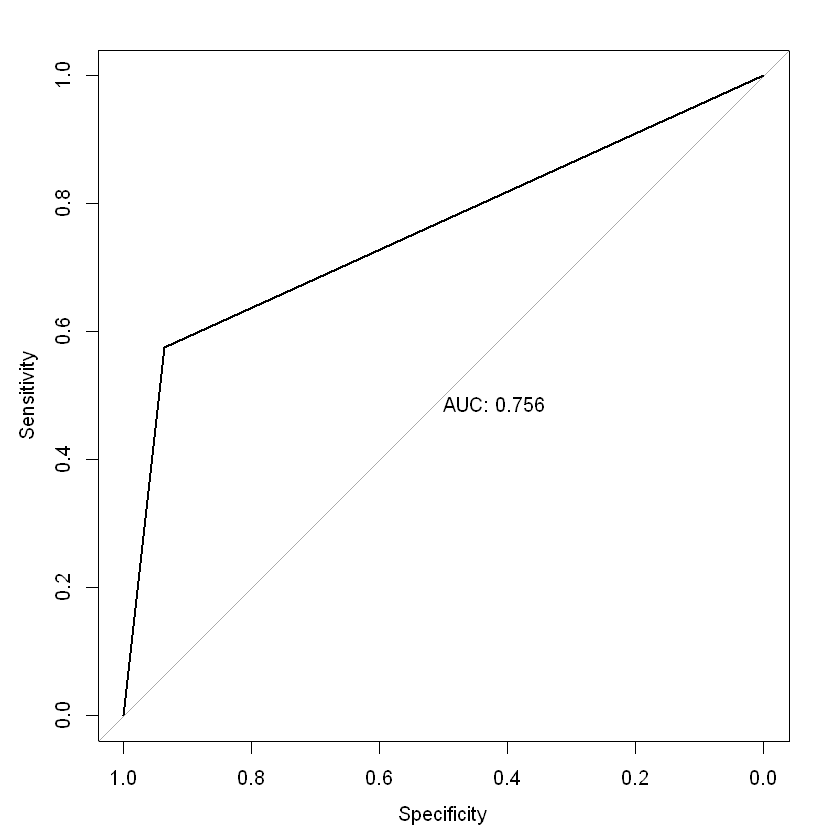

In [38]:
test.data$svm.predict= svm.predict
roc_svm= roc(response= test.data$salary, predictor = factor(test.data$svm.predict, ordered=TRUE), plot=TRUE, print.auc=TRUE)

SVM on balanced dataset

In [39]:
svm.model1<- svm(salary~., data = data_rose,kernel = "radial", cost = 1, gamma = 0.1)
svm.predict1 <- predict(svm.model1, test.data)
confusionMatrix(test.data$salary, svm.predict1, mode="everything")

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   5216   743
     >50K     573  1505
                                         
               Accuracy : 0.8363         
                 95% CI : (0.828, 0.8443)
    No Information Rate : 0.7203         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.584          
                                         
 Mcnemar's Test P-Value : 3.183e-06      
                                         
            Sensitivity : 0.9010         
            Specificity : 0.6695         
         Pos Pred Value : 0.8753         
         Neg Pred Value : 0.7243         
              Precision : 0.8753         
                 Recall : 0.9010         
                     F1 : 0.8880         
             Prevalence : 0.7203         
         Detection Rate : 0.6490         
   Detection Prevalence : 0.7414         
      Balanced Accuracy : 0.7853   

Setting levels: control =  <=50K, case =  >50K

Warning message in value[[3L]](cond):
"Ordered predictor converted to numeric vector. Threshold values will not correspond to values in predictor."
Setting direction: controls < cases



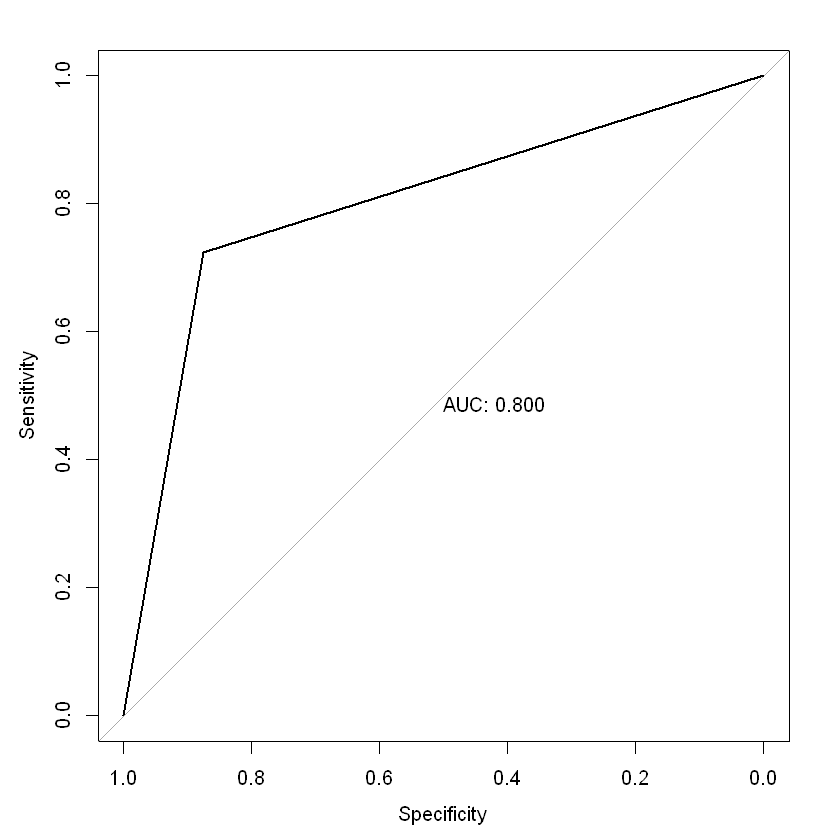

In [40]:
test.data$svm.predict1= svm.predict1
roc_svm1= roc(response= test.data$salary, predictor = factor(test.data$svm.predict1, ordered=TRUE), plot=TRUE, print.auc=TRUE)

# Random Forest

In [41]:
install.packages('randomForest')
library(randomForest)

Warning message:
"package 'randomForest' is in use and will not be installed"


In [42]:
rf.model<- randomForest(salary~.,data = train.data,importance=TRUE,keep.forest=TRUE)
rf.predict <- predict(rf.model, test.data)
confusionMatrix(test.data$salary, rf.predict, mode="everything")

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   5544   415
     >50K     729  1349
                                          
               Accuracy : 0.8577          
                 95% CI : (0.8498, 0.8652)
    No Information Rate : 0.7805          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6095          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8838          
            Specificity : 0.7647          
         Pos Pred Value : 0.9304          
         Neg Pred Value : 0.6492          
              Precision : 0.9304          
                 Recall : 0.8838          
                     F1 : 0.9065          
             Prevalence : 0.7805          
         Detection Rate : 0.6898          
   Detection Prevalence : 0.7414          
      Balanced 

Setting levels: control =  <=50K, case =  >50K

Warning message in value[[3L]](cond):
"Ordered predictor converted to numeric vector. Threshold values will not correspond to values in predictor."
Setting direction: controls < cases



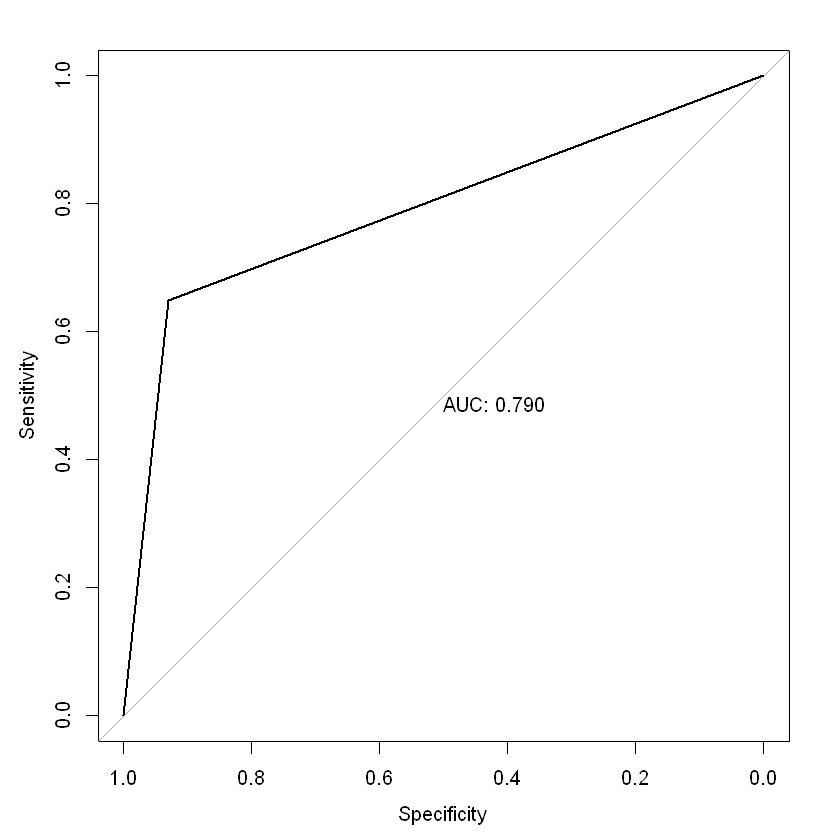

In [43]:
test.data$rf.predict= rf.predict
roc_rf= roc(response= test.data$salary, predictor = factor(test.data$rf.predict, ordered=TRUE), plot=TRUE, print.auc=TRUE)

Using balanced dataset

In [44]:
rf.model1<- randomForest(salary~.,data = data_rose,importance=TRUE,keep.forest=TRUE)
rf.predict1 <- predict(rf.model1, test.data)
confusionMatrix(test.data$salary, rf.predict1, mode="everything")

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   5731   228
     >50K    1393   685
                                         
               Accuracy : 0.7983         
                 95% CI : (0.7894, 0.807)
    No Information Rate : 0.8864         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.3565         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.8045         
            Specificity : 0.7503         
         Pos Pred Value : 0.9617         
         Neg Pred Value : 0.3296         
              Precision : 0.9617         
                 Recall : 0.8045         
                     F1 : 0.8761         
             Prevalence : 0.8864         
         Detection Rate : 0.7131         
   Detection Prevalence : 0.7414         
      Balanced Accuracy : 0.7774   

Setting levels: control =  <=50K, case =  >50K

Warning message in value[[3L]](cond):
"Ordered predictor converted to numeric vector. Threshold values will not correspond to values in predictor."
Setting direction: controls < cases



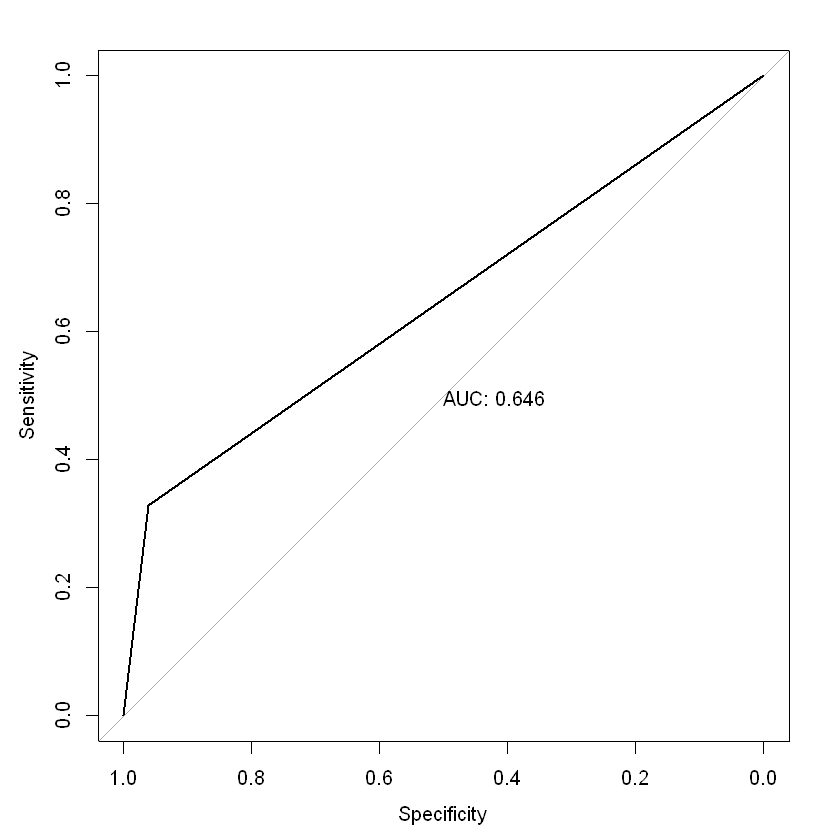

In [45]:
test.data$rf.predict1= rf.predict1
roc_rf1= roc(response= test.data$salary, predictor = factor(test.data$rf.predict1, ordered=TRUE), plot=TRUE, print.auc=TRUE)

# Logistic Regression

In [46]:
glm.fit<- glm(salary~., family=binomial,data = train.data)
summary(glm.fit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = salary ~ ., family = binomial, data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0981  -0.5133  -0.1868  -0.0010   3.6698  

Coefficients: (1 not defined because of singularities)
                                            Estimate Std. Error z value
(Intercept)                               -8.699e+00  1.018e+00  -8.542
fnlwgt                                     6.318e-07  2.100e-07   3.008
capital.gain                               3.200e-04  1.251e-05  25.571
capital.loss                               6.313e-04  4.551e-05  13.871
hours.per.week                             3.099e-02  2.019e-03  15.348
age                                        2.705e-02  2.016e-03  13.418
education.num                              2.640e-01  4.523e-02   5.837
workclass Local-gov                       -7.602e-01  1.321e-01  -5.754
workclass Private                         -5.568e-01  1.094e-01  -5.091
workclass Self-emp-inc                 

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


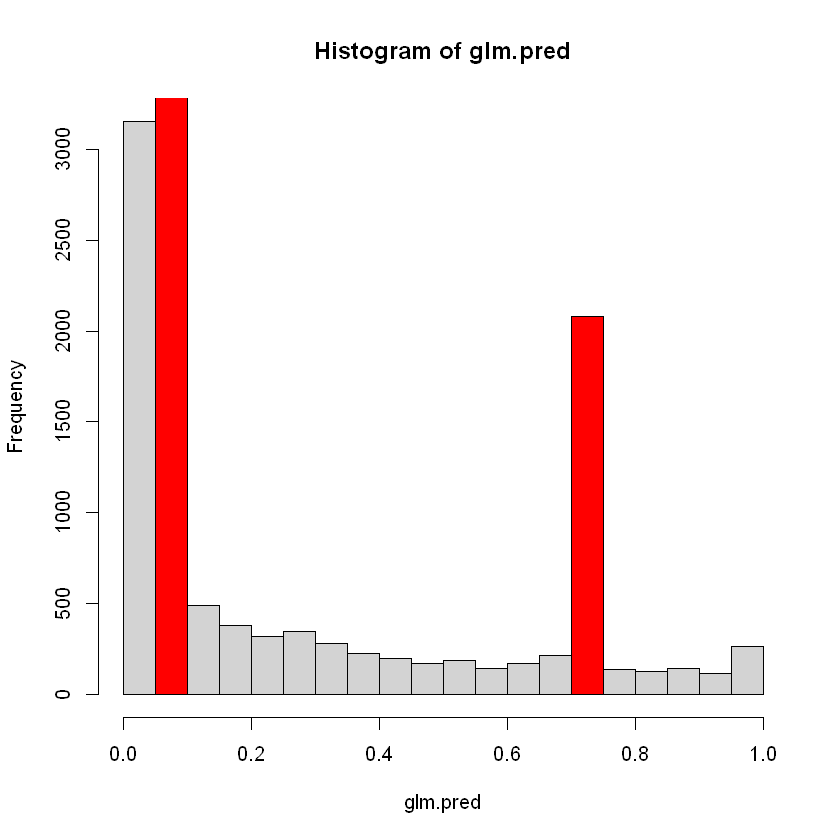

In [47]:
set.seed(123)
glm.pred<- predict(glm.fit, test.data, type = "response")
hist(glm.pred, breaks=20)
hist(glm.pred[test.data$salary], col="red", breaks=20, add=TRUE)

In [48]:
table(actual= test.data$salary, predicted= glm.pred>0.5)

        predicted
actual   FALSE TRUE
   <=50K  5517  442
   >50K    845 1233

In [49]:
#Accuracy
(5517+1233)/8037
#sensitivity
5517/(5517+845)
#specitivity
1233/(1233+442)

[1] 0.8398656

[1] 0.8671801

[1] 0.7361194

Setting levels: control =  <=50K, case =  >50K

Setting direction: controls < cases



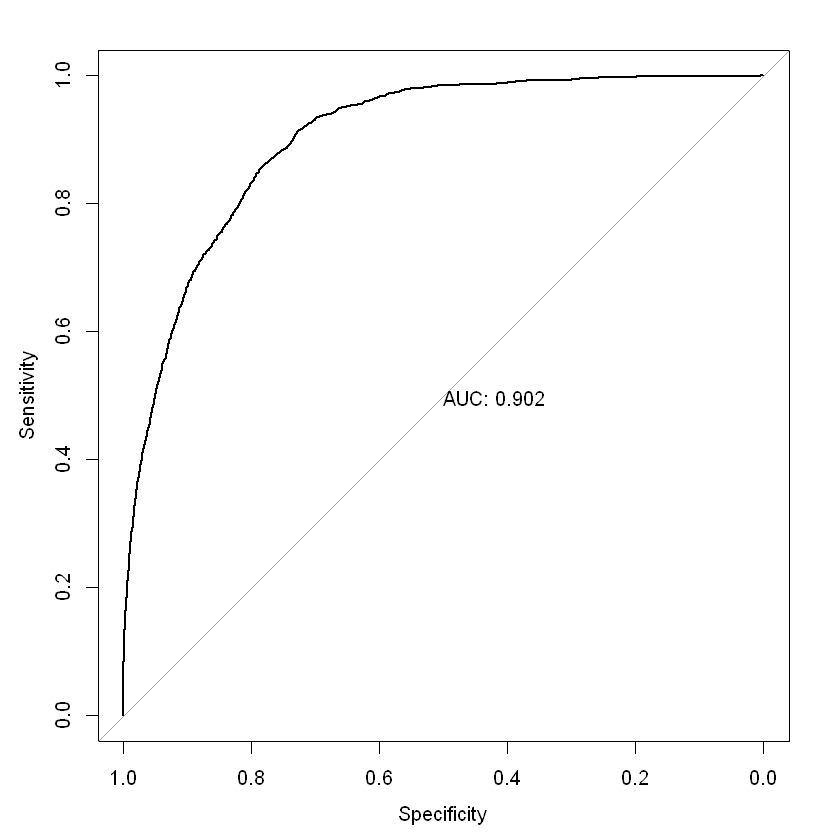

In [50]:
test.data$glm.pred= glm.pred
roc_glm= roc(response= test.data$salary, predictor = factor(test.data$glm.pred, ordered=TRUE), plot=TRUE, print.auc=TRUE)

In [51]:
set.seed(1234)
glm.fit2<- glm(salary ~ age + workclass + education.num 
               + fnlwgt + marital.status, 
               family=binomial(link='logit'),data = train.data)
glm.pred2<- predict(glm.fit2, test.data, type = "response")
table(actual= test.data$salary, predicted= glm.pred2>0.5)

        predicted
actual   FALSE TRUE
   <=50K  5507  452
   >50K   1055 1023

In [52]:
#Accuracy
(5507+1033)/8037
#sensitivity
5507/(5507+1055)
#specitivity
1023/(1023+452)

[1] 0.8137365

[1] 0.8392258

[1] 0.6935593

Setting levels: control =  <=50K, case =  >50K

Setting direction: controls < cases



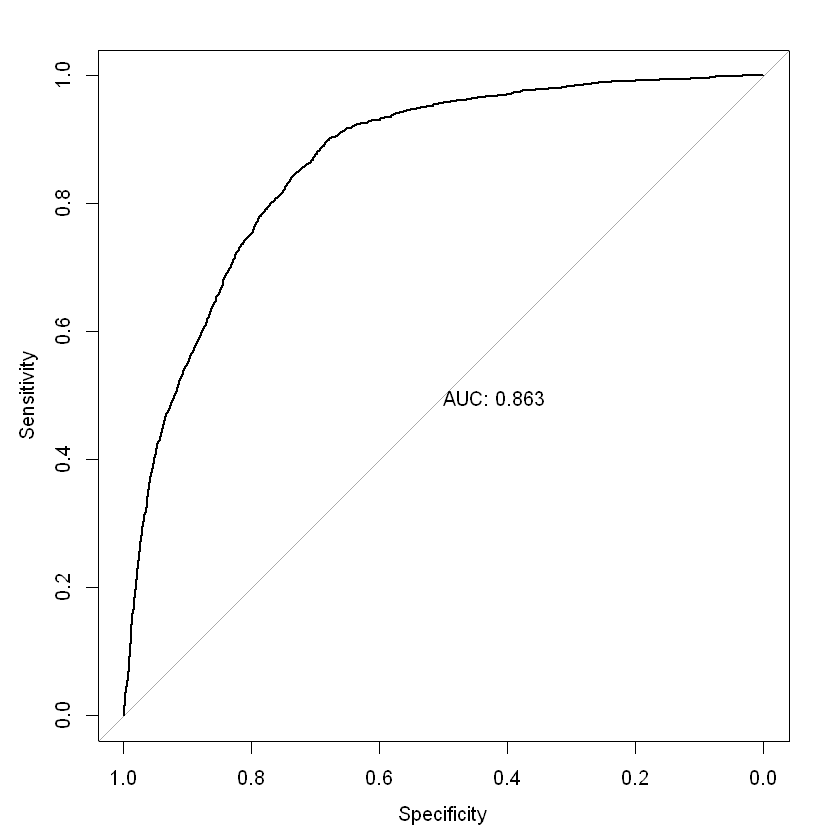

In [53]:
test.data$glm.pred2= glm.pred2
roc_glm2= roc(response= test.data$salary, predictor = factor(test.data$glm.pred2, ordered=TRUE), plot=TRUE, print.auc=TRUE)

Logistic regression on balanced dataset

In [54]:
glm.fit1<- glm(salary~., family=binomial,data = data_rose)
summary(glm.fit1)


Call:
glm(formula = salary ~ ., family = binomial, data = data_rose)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1127  -0.5457  -0.0494   0.6372   3.4092  

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                               -5.862e+00  1.153e+00  -5.083
fnlwgt                                     7.847e-07  1.759e-07   4.460
capital.gain                               7.645e-05  3.719e-06  20.558
capital.loss                               4.649e-04  3.975e-05  11.695
hours.per.week                             2.861e-02  1.752e-03  16.329
age                                        2.988e-02  1.730e-03  17.270
education.num                              4.674e-02  2.122e-02   2.203
workclass Local-gov                       -9.322e-01  1.224e-01  -7.618
workclass Private                         -7.185e-01  1.025e-01  -7.011
workclass Self-emp-inc                    -4.320e-01  1.369e-01  -3.157
workclass

        predicted
actual   FALSE TRUE
   <=50K  4732 1227
   >50K    353 1725

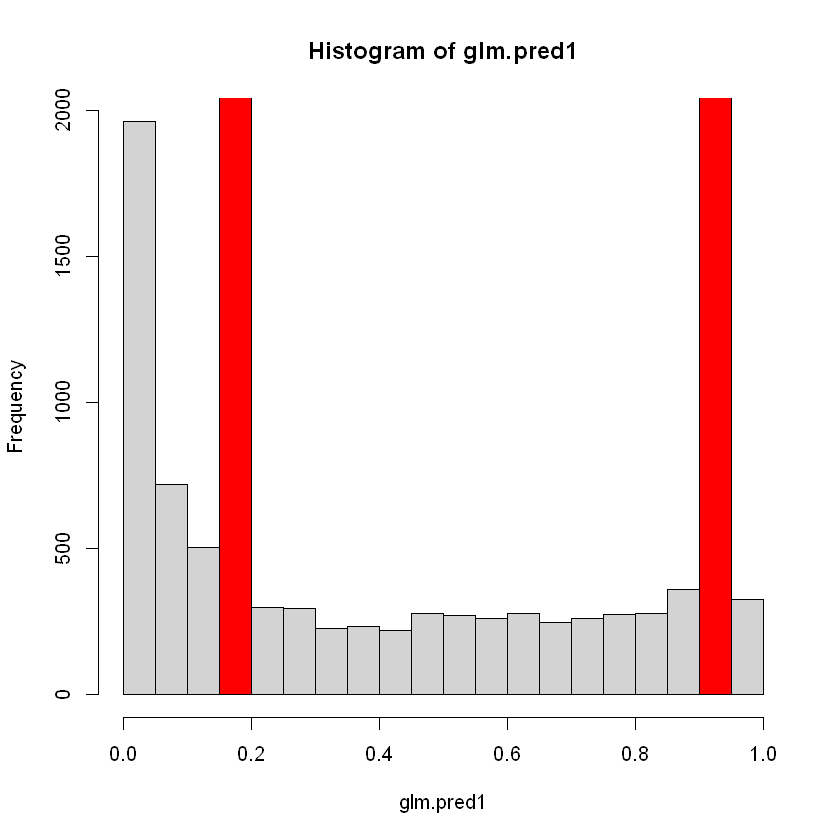

In [55]:
set.seed(123)
glm.pred1<- predict(glm.fit1, test.data, type = "response")
hist(glm.pred1, breaks=20)
hist(glm.pred1[test.data$salary], col="red", breaks=20, add=TRUE)

table(actual= test.data$salary, predicted= glm.pred1>0.5)

In [56]:
(4732+1725)/8037
4732/(4732+353)
1725/(1725+1227)

[1] 0.8034092

[1] 0.9305801

[1] 0.5843496